In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def system(t, y):
    dxdt = y * (y - 1) * (y + 2)
    dt = np.ones_like(t)
    return dt, dxdt

In [31]:
# Define range
lim = 3
samples = 200 * lim

x_range = np.linspace(0, 2 * lim, samples)
y_range = np.linspace(-lim, lim, samples)

# Create meshgrid
X, Y = np.meshgrid(x_range, y_range)

# Calculate derivatives
DX, DY = system(X, Y)

# Streamplot for the phase portrait
# Using a denser grid for streamplot to make it look smoother
x_dense = np.linspace(0, 2 * lim, samples * 10)
y_dense = np.linspace(-lim, lim, samples * 10)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
DX_dense, DY_dense = system(X_dense, Y_dense)

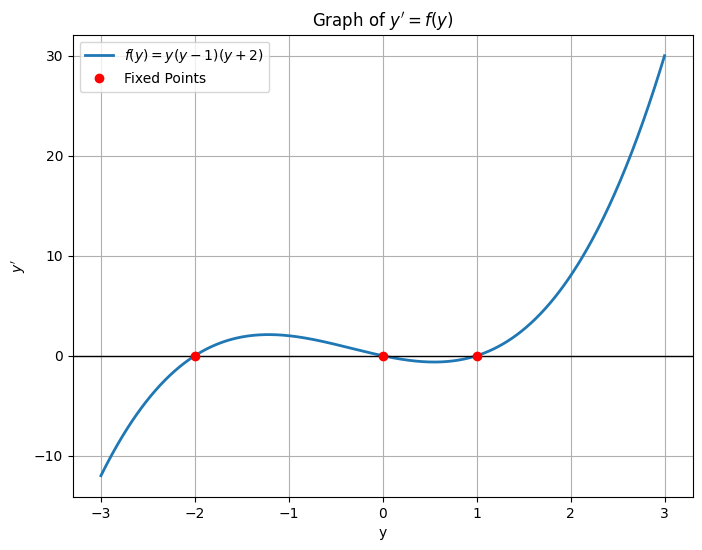

In [32]:
# Plot y' = f(y)
plt.figure(figsize=(8, 6))

y_eval = np.linspace(-lim, lim, samples)
_, dy_eval = system(0, y_eval)

plt.plot(y_eval, dy_eval, linewidth=2, label=r"$f(y) = y(y-1)(y+2)$")
plt.axhline(0, color="black", linewidth=1)

# Mark fixed points
f_points = [0, 1, -2]
plt.plot(f_points, [0] * len(f_points), "ro", label="Fixed Points")

plt.title(r"Graph of $y' = f(y)$")
plt.xlabel("y")
plt.ylabel(r"$y'$")
plt.grid(True)
plt.legend()

Using matplotlib backend: inline


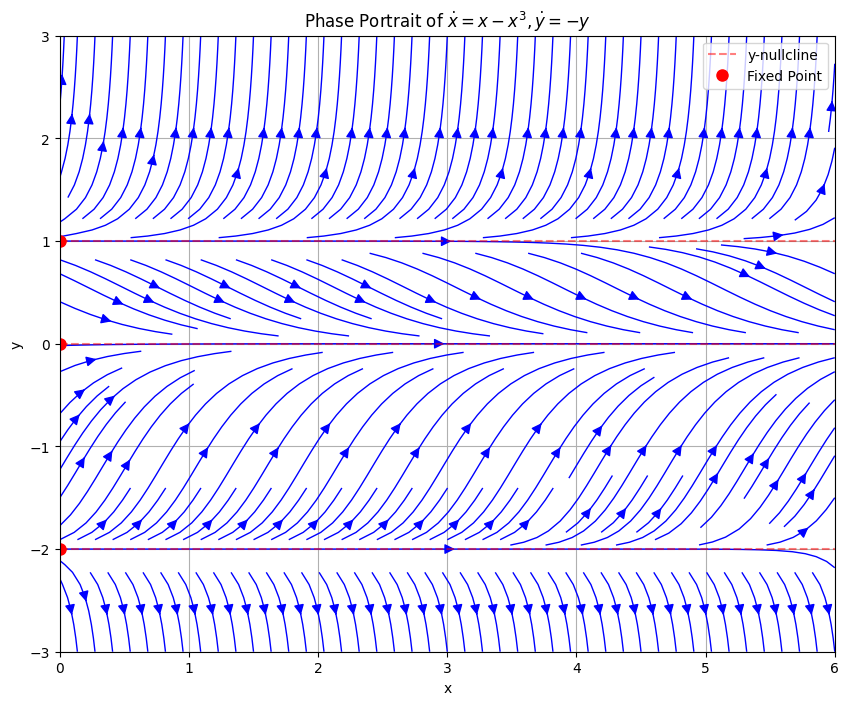

In [33]:
%matplotlib
plt.figure(figsize=(10, 8))

plt.streamplot(
    X_dense,
    Y_dense,
    DX_dense,
    DY_dense,
    color="blue",
    density=1.5,
    linewidth=1,
    arrowsize=1.5,
)

# Plot Nullclines
plt.axhline(y=-2, color="red", linestyle="--", alpha=0.5, label="y-nullcline")
plt.axhline(y=0, color="red", linestyle="--", alpha=0.5)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.5)

fixed_points = [(0, -2), (0, 0), (0, 1)]
for point in fixed_points:
    plt.plot(
        point[0],
        point[1],
        "ro",
        markersize=8,
        label="Fixed Point" if point == fixed_points[0] else "",
    )

plt.title(r"Phase Portrait of $\dot{x} = x - x^3, \dot{y} = -y$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
plt.legend()
# plt.show()